<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/4_Data_Wrangling_Avanzado/ejercicio/ejercicio.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Ejercicio: Informe macroeconómico de Argentina

La consultora "Nuevos Horizontes" quiere hacer un análisis del mercado argentino para entender como ha evolucionado en los últimos años. Van a analizar dos indicadores macroeconómicos principales: el **IPC: Índice de Precios al Consumidor** (para medir inflación) y el tipo de cambio (**cotización del dólar**).

## IPC: Índice de Precios al Consumidor

Para más información sobre el IPC pueden visitar la siguiente página del INDEC: https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-5-31

La base de IPC a analizar tiene como base diciembre de 2016, al cual le corresponde el índice 100. Los precios se encuentran con cuatro niveles de apertura: 

* General: Indice de Precios de toda la canasta de bienes y servicios considerada en el análisis

* Estacional: Bienes y servicios con comportamiento estacional. Por ejemplo: frutas y verduras

* Regulados: Bienes y servicios cuyos precios están sujetos a regulación o tienen alto componente impositivo. Por ejemplo: electricidad

* Núcleo: : Resto de los grupos del IPC

Su jefa quiere analizar el comportamiento de los cuatro niveles de apertura del indice de precios en los años que componen el dataset. Para eso le pide que obtenga el promedio, mediana e índice máximo anuales para cada nivel de apertura. Luego, de ser posible, graficar la evolución anual del índice medio a nivel general.

**Pasos sugeridos:**

    1) Leer los datos del IPC.

    2) Modificar la tabla para que cumpla con la definición de tidy data: cada variable debe ser una columna (Apertura, Fecha e Indice).

    3) Convertir la variable de fecha al formato date-time y extraer el año y el mes.

    *Ayuda*: Vas a tener que utilizar el argumento format en la función to_datetime de pandas. En esta página vas a poder encontrar los códigos de formato o directivas necesarios para convertir las fechas: https://docs.python.org/es/3/library/datetime.html#strftime-and-strptime-behavior

    4) Calcular el indice promedio, mediano y maximo por año para cada nivel de apertura.

    5) Graficar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**1) Leer los datos del IPC.**

In [2]:
ipc_df = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/ipc_indec.csv')

In [3]:
ipc_df.shape

(4, 44)

In [4]:
ipc_df

,Apertura,Dec-16,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,...,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20
0,Nivel general,100.0,101.6,103.7,106.1,109.0,110.5,111.8,113.8,115.4,...,253.7,262.1,273.2,283.4,289.8,295.7,305.6,310.1,314.9,322.0
1,Estacional,100.0,101.7,102.3,104.8,108.2,109.1,110.1,110.6,111.8,...,217.0,223.2,239.6,244.7,253.6,260.0,272.7,285.9,299.3,313.6
2,Núcleo,100.0,101.5,103.2,105.2,107.4,109.2,110.7,112.6,114.2,...,250.5,260.0,270.4,280.3,287.2,294.0,303.2,308.4,313.3,320.6
3,Regulados,100.0,101.8,105.9,110.0,114.5,115.7,116.7,119.4,121.1,...,284.7,290.5,301.6,315.5,319.1,321.3,331.9,329.7,329.4,331.8


In [5]:
ipc_df['Apertura']

0    Nivel general
1       Estacional
2           Núcleo
3        Regulados
Name: Apertura, dtype: object

**2) Modificar la tabla** para que cumpla con la definición de tidy data: cada variable debe ser una columna (Apertura, Fecha e Indice).

In [36]:
pd.melt?

In [6]:
# df = pd.melt(ipc_df,
#     id_vars='Apertura',
#     var_name='Fecha',         
#     value_name='Indice'    
# )
df = ipc_df.melt(
    id_vars='Apertura',
    var_name='Fecha',         
    value_name='Indice'    
)

In [22]:
df

,Apertura,Indice,Anio,Mes
Fecha,,,,
2016-12-01,Nivel general,100.0,2016,12
2016-12-01,Estacional,100.0,2016,12
2016-12-01,Núcleo,100.0,2016,12
2016-12-01,Regulados,100.0,2016,12
2017-01-01,Nivel general,101.6,2017,1
...,...,...,...,...
2020-05-01,Regulados,329.4,2020,5
2020-06-01,Nivel general,322.0,2020,6
2020-06-01,Estacional,313.6,2020,6


**3)** Convertir la **variable de fecha** al formato date-time y extraer el año y el mes


In [8]:
df['Fecha']= pd.to_datetime(df['Fecha'],format="%b-%y")

In [9]:
df=df.set_index('Fecha')

In [10]:
df['Anio']= df.index.year
df['Mes']= df.index.month

In [26]:
df[df['Apertura']=='Nivel general']

,Apertura,Indice,Anio,Mes
Fecha,,,,
2016-12-01,Nivel general,100.0,2016,12
2017-01-01,Nivel general,101.6,2017,1
2017-02-01,Nivel general,103.7,2017,2
2017-03-01,Nivel general,106.1,2017,3
2017-04-01,Nivel general,109.0,2017,4
2017-05-01,Nivel general,110.5,2017,5
2017-06-01,Nivel general,111.8,2017,6
2017-07-01,Nivel general,113.8,2017,7
2017-08-01,Nivel general,115.4,2017,8


In [27]:
df[df['Apertura']=='Nivel general'].plot

**4)** Calcular el **indice promedio, mediano y maximo** por año para cada nivel de apertura.

In [90]:
df.groupby?

In [28]:
df.groupby(['Apertura','Anio']).agg(
          {'Indice':['max','min','mean']})

Indice                   
                      max    min        mean
Apertura      Anio                          
Estacional    2016  100.0  100.0  100.000000
              2017  121.5  101.7  111.366667
              2018  164.3  123.9  139.958333
              2019  244.7  166.1  198.083333
              2020  313.6  253.6  280.850000
Nivel general 2016  100.0  100.0  100.000000
              2017  124.8  101.6  112.891667
              2018  184.3  127.0  151.583333
              2019  283.4  189.6  232.758333
              2020  322.0  289.8  306.350000
Núcleo        2016  100.0  100.0  100.000000
              2017  121.1  101.5  111.491667
              2018  178.9  122.9  146.825000
              2019  280.3  184.3  228.291667
              2020  320.6  287.2  304.450000
Regulados     2016  100.0  100.0  100.000000
              2017  138.7  101.8  118.283333
              2018  212.9  141.7  173.716667
              2019  315.5  220.1  266.600000
              2020  331.9  319.1  327.200000

**5) Graficar**

<AxesSubplot:xlabel='Fecha'>

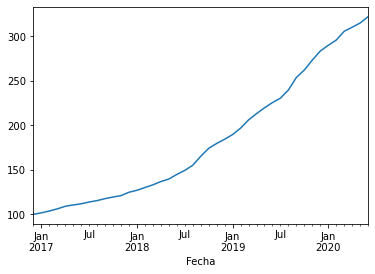

In [29]:
df[df['Apertura']=='Nivel general']['Indice'].plot()

# Dolar
La base de cotización de dolar traer los precios de compra y venta oficiales de la divisa en Argentina desde el 01-06-2015 hasta el 03-08-2020 según el portal Ámbito Financiero.

Para proseguir con el informe se quiere obtener la cotización media diaria (promedio entre compra y venta) y obtener la mediana mensual con su respectivo gráfico. Adicionalmente, se quiere encontrar el top 5 de los días con mayores aumentos porcentuales en el tipo de cambio para la misma ventana de tiempo que se analizó el IPC (desde 01-12-2016 hasta el 30-06-2020)

**Pasos sugeridos:**

    1) Leer los datos de la cotización del dolar

    2) Crear una variable que compute el valor promedio entre compra y venta por día

    3) Convertir la fecha de un dato tipo string a un objeto datetime (to_datetime). Construir las variables de año y mes. 

    4) Calcular el promedio mensual y graficar (recordar ordenar en forma ascendente la fecha)

    5) Ordenar de manera ascendente por fecha, filtrar las fechas señaladas y calcular la variación porcentual diaria en la cotización

    6) Hallar los 5 días con mayor variación en la cotización.

**1)** Leer los datos de la cotización del dolar

In [49]:
dolar_df = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/dolar_oficial_ambito.csv')

In [50]:
dolar_df

,fecha,compra,venta
0,05-08-2020,71.89,76.89
1,04-08-2020,71.69,76.69
2,03-08-2020,71.64,76.64
3,31-07-2020,71.39,76.39
4,30-07-2020,71.27,76.27
...,...,...,...
1263,05-06-2015,8.98,9.03
1264,04-06-2015,8.97,9.02
1265,03-06-2015,8.97,9.02
1266,02-06-2015,8.97,9.02


**2)** Crear una variable que compute el valor **promedio** entre compra y venta por día

In [51]:
dolar_df.loc[:,['compra','venta']].mean(axis=1)

0       74.390
1       74.190
2       74.140
3       73.890
4       73.770
         ...  
1263     9.005
1264     8.995
1265     8.995
1266     8.995
1267     8.985
Length: 1268, dtype: float64

In [101]:
dolar_df.loc[:,['compra','venta']].median(axis=1)

11       8.985
53       8.995
97       8.995
141      8.995
184      9.005
         ...  
1226    73.770
1258    73.890
110     74.140
152     74.190
196     74.390
Length: 1268, dtype: float64

In [52]:
%%time
# dolar_df['Promedio']=(dolar_df['compra']+dolar_df['venta'])/2
dolar_df['Promedio']=dolar_df.loc[:,['compra','venta']].mean(axis=1)


Wall time: 2.89 ms


In [58]:
# DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
dolar_df.sort_values('fecha', axis=0, ascending=True, inplace=True)

In [71]:
# dolar_df.reset_index(inplace=True)
dolar_df.drop(columns=['index', 'level_0'],inplace=True)

In [72]:
dolar_df

,fecha,compra,venta,Promedio
0,01-02-2016,13.90,14.30,14.10
1,01-02-2017,15.72,16.12,15.92
2,01-02-2018,19.36,19.76,19.56
3,01-02-2019,36.31,38.31,37.31
4,01-03-2016,15.69,16.09,15.89
...,...,...,...,...
1263,31-10-2016,15.00,15.40,15.20
1264,31-10-2017,17.55,17.95,17.75
1265,31-10-2018,34.98,36.98,35.98
1266,31-10-2019,58.22,63.22,60.72


**3)** Convertir la **fecha** de un dato tipo string a un objeto datetime (to_datetime) y construir las variables de año y mes

In [88]:
dolar_df['fecha']=pd.to_datetime(dolar_df['fecha'], format='%d-%m-%Y')
dolar_df['anio']=dolar_df['fecha'].dt.year
dolar_df['mes']=dolar_df['fecha'].dt.month

In [89]:
dolar_df

,fecha,compra,venta,Promedio,anio,mes
0,2016-02-01,13.90,14.30,14.10,2016,2
1,2017-02-01,15.72,16.12,15.92,2017,2
2,2018-02-01,19.36,19.76,19.56,2018,2
3,2019-02-01,36.31,38.31,37.31,2019,2
4,2016-03-01,15.69,16.09,15.89,2016,3
...,...,...,...,...,...,...
1263,2016-10-31,15.00,15.40,15.20,2016,10
1264,2017-10-31,17.55,17.95,17.75,2017,10
1265,2018-10-31,34.98,36.98,35.98,2018,10
1266,2019-10-31,58.22,63.22,60.72,2019,10


**4)** Calcular el promedio mensual y graficar.

<AxesSubplot:xlabel='anio,mes'>

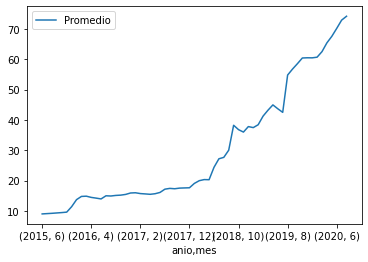

In [130]:
dolar_df.groupby(['anio','mes']).agg({'Promedio': 'median'}).plot()

In [117]:
dolar_df.sort_values('fecha',ascending=True,inplace=True)
dolar_df.reset_index(drop=True)
dolar_df

,fecha,compra,venta,Promedio,anio,mes
11,2015-06-01,8.96,9.01,8.985,2015,6
53,2015-06-02,8.97,9.02,8.995,2015,6
97,2015-06-03,8.97,9.02,8.995,2015,6
141,2015-06-04,8.97,9.02,8.995,2015,6
184,2015-06-05,8.98,9.03,9.005,2015,6
...,...,...,...,...,...,...
1226,2020-07-30,71.27,76.27,73.770,2020,7
1258,2020-07-31,71.39,76.39,73.890,2020,7
110,2020-08-03,71.64,76.64,74.140,2020,8
152,2020-08-04,71.69,76.69,74.190,2020,8


**5)** Ordenar de manera ascendente por fecha, filtrar las fechas señaladas y calcular la variación porcentual diaria en la cotización

Para calcular la variación porcentual debemos realizar la siguiente cuenta:

$VariacionPorcentual = \frac{CotizacionHoy - CotizacionAyer}{CotizacionAyer}*100$

In [109]:
df = dolar_df[dolar_df['fecha'].between('2016-12-01','2020-06-30')].sort_values('fecha', ascending=True)

In [116]:
df.reset_index(drop=True)

,fecha,compra,venta,Promedio,anio,mes
0,2016-12-01,15.71,16.11,15.91,2016,12
1,2016-12-02,15.70,16.10,15.90,2016,12
2,2016-12-05,15.75,16.15,15.95,2016,12
3,2016-12-06,15.73,16.13,15.93,2016,12
4,2016-12-07,15.79,16.19,15.99,2016,12
...,...,...,...,...,...,...
865,2020-06-24,68.51,73.51,71.01,2020,6
866,2020-06-25,68.53,73.53,71.03,2020,6
867,2020-06-26,68.56,73.56,71.06,2020,6
868,2020-06-29,68.86,73.86,71.36,2020,6


In [176]:
df.set_index('fecha', inplace=True)
df

,compra,venta,cotizacion_hoy,anio,mes,cotizacion_ayer,diferencia,variacion
fecha,,,,,,,,
2016-12-01,15.71,16.11,15.91,2016,12,0.00,0.00,0.00
2016-12-02,15.70,16.10,15.90,2016,12,15.91,-0.01,-0.06
2016-12-05,15.75,16.15,15.95,2016,12,15.90,0.05,0.31
2016-12-06,15.73,16.13,15.93,2016,12,15.95,-0.02,-0.13
2016-12-07,15.79,16.19,15.99,2016,12,15.93,0.06,0.38
...,...,...,...,...,...,...,...,...
2020-06-24,68.51,73.51,71.01,2020,6,70.94,0.07,0.10
2020-06-25,68.53,73.53,71.03,2020,6,71.01,0.02,0.03
2020-06-26,68.56,73.56,71.06,2020,6,71.03,0.03,0.04


In [188]:
# df.columns = ['fecha', 'compra', 'venta', 'cotizacion_hoy', 'anio', 'mes']
df['cotizacion_ayer']= df['cotizacion_hoy'].shift(periods=1)
df['diferencia'] = df['cotizacion_hoy'].diff(periods=1)
df['variacion'] = round((df['diferencia']/df['cotizacion_ayer']*100),2)
df['variacion_abs'] = abs(round((df['diferencia']/df['cotizacion_ayer']*100),2))
df=df.fillna(0)

In [181]:
df.plot?

<AxesSubplot:xlabel='fecha'>

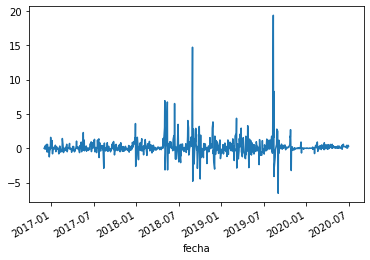

In [183]:
df['variacion'].plot()

**6)** Hallar los 5 días con mayor variación en la cotización.

In [191]:
# df['variacion']
# df[abs(df['variacion'])==abs(df['variacion']).sort_values(ascending=False)]
df.sort_values('variacion_abs', ascending=False).head(5)

,compra,venta,cotizacion_hoy,anio,mes,cotizacion_ayer,diferencia,variacion,variacion_abs
fecha,,,,,,,,,
2019-08-12,51.23,57.30,54.265,2019,8,45.450,8.815,19.39,19.39
2018-08-30,37.87,39.87,38.870,2018,8,33.880,4.990,14.73,14.73
2019-08-14,57.18,62.18,59.680,2019,8,55.105,4.575,8.30,8.30
2018-08-29,33.28,34.48,33.880,2018,8,31.570,2.310,7.32,7.32
2018-05-03,22.60,23.00,22.800,2018,5,21.320,1.480,6.94,6.94
